# EDA in Pandas

Este archivo y su base de datos adjunta proviene de un curso análisis de datos entregado por el canal "Alex The Analyst" en Youtube. Se realiza un análisis exploratorio de datos sobre un archivo .csv que contiene información acerca de la población mundial entre los años 1970 y 2022.

-      link: https://www.youtube.com/watch?v=Liv6eeb1VfE&t=785s

Son nociones básicas de la librería pandas y análisis exploratorio de datos que pueden utilizar para complementar, aquí los códigos están modificados y comentados para intentar hacer más amigable el acercamiento a la herramienta, lo ideal sería que también mire el video.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

La función en "read_csv()" en Pandas se utiliza para cargar archivos de tipo csv a un objeto DataFrame, entre sus argumentos básicos tenemos:

-   filepath_or_buffer: La ruta al archivo y su nombre, en caso de estar en la misma carpeta sólo coloque el nombre.
-   sep: Es el carácter que separa los valores del csv (default= ",").
-   header: Indica la fila que contiene el nombre de las columnas o variables, la primera fila es 0.

In [2]:
df = pd.read_csv(r"world_population.csv")  # Lectura de archivo .csv, el primer argumento es "filepath_or_buffer".
df

FileNotFoundError: [Errno 2] No such file or directory: 'world_population.csv'

La función pd.set_option() se utiliza para configurar la visualización de la tabla, en la linea de abajo tenemos:
-   pd.set_option(): es el acceso a las opciones de pandas.
-   "display.float_format": es la opción específica a modificar, que corresponde al formato de visualización de variables float.
-   "lambda x: '%.2f' % x": se utiliza para indicar que todo float debe mostrar dos décimales luego de la coma.

In [25]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)  # formato de vista, por defecto está en notación científica.

El Acceso a una columna/variable se hace como si fuera un diccionario:
Dataframe['Nombre_variable']

Ojo que es otra estructura estructura llamada Serie. Los Dataframe son conjuntos de Series.

In [92]:
print('La columna "Continent" es una Serie: \n', df['Continent'])

df['Continent'][1]  # Primer valor de la columna continent, se puede acceder de forma similar a una lista.

La columna "Continent" es una Serie: 
 0         Asia
1       Europe
2       Africa
3      Oceania
4       Europe
        ...   
229    Oceania
230     Africa
231       Asia
232     Africa
233     Africa
Name: Continent, Length: 234, dtype: object


'Europe'

En el método info() de los objetos Dataframe se entrega un resumen de la estructura de datos.

-   "RangeIndex": muestra la cantidad de datos (234 en total).
-   "#" es el índice de variable en este caso hay 16 contando el 0.
-   "column" muestra el nombre asginado a cada columna/variable.
-   "Non-Null Count" es la cantidad de datos no-nulos, lo ideal es que sea igual al RangeIndex pero en la práctica es improbable.
-   "Dtype": indica el tipo de dato que se almacena en la columna (los strings cuentan como object).
-   "memory usage": Estima la cantidad de memoria que utiliza el DataFrame. Para pocos datos y procesos pequeños es irrelevante.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country                      234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              230 non-null    float64
 6   2020 Population              233 non-null    float64
 7   2015 Population              230 non-null    float64
 8   2010 Population              227 non-null    float64
 9   2000 Population              227 non-null    float64
 10  1990 Population              229 non-null    float64
 11  1980 Population              229 non-null    float64
 12  1970 Population              230 non-null    float64
 13  Area (km²)          

El método describe entrega un resumen estadístico de variables numéricas, entre ellos:
-   "count": Es el número de valores no-nulos en la variable.
-   "mean": Es la media artimética (promedio)
-   "std": Es la desviación estándar.
-   "min": Valor más pequeño que toma la variable.
-   "25%": Primer cuartil
-   "50%": Segundo cuartil (mediana)
-   "75%": Tercer cuartil
-   "max": Valor máximo que alcanza la variable.

Cuando se incluyen datos cualitativos, se puede agregar el argumento include='all' para agregar la frecuencia, la moda y la conteo de datos diferentes.

In [11]:
df.describe()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.00,230.00,233.00,230.00,227.00,227.00,229.00,229.00,230.00,232.00,230.00,232.00,234.00
mean,117.50,34632250.88,33600710.95,32066004.16,30270164.48,26840495.26,19330463.93,16282884.78,15866499.13,581663.75,456.81,1.01,0.43
std,67.69,137889172.44,135873196.61,131507146.34,126074183.54,113352454.57,81309624.96,69345465.54,68355859.75,1769133.06,2083.74,0.01,1.71
min,1.00,510.00,520.00,564.00,596.00,651.00,700.00,733.00,752.00,1.00,0.03,0.91,0.00
25%,59.25,419738.50,406471.00,394295.00,382726.50,329470.00,261928.00,223752.00,145880.50,2567.25,36.60,1.00,0.01
50%,117.50,5762857.00,5456681.00,5244415.00,4889741.00,4491202.00,3785847.00,3135123.00,2511718.00,77141.00,95.35,1.01,0.07
75%,175.75,22653719.00,21522626.00,19730853.75,16825852.50,15625467.00,11882762.00,9817257.00,8817329.00,414643.25,236.88,1.02,0.28
max,234.00,1425887337.00,1424929781.00,1393715448.00,1348191368.00,1264099069.00,1153704252.00,982372466.00,822534450.00,17098242.00,23172.27,1.07,17.88


In [94]:
df.describe(include='all')  # Para la variable "Continent" tenemos 6 valores posibles, la moda es África y su frecuencia es 57 (incluye estados no reconocidos).

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.00,234,234,234,234,230.00,233.00,230.00,227.00,227.00,229.00,229.00,230.00,232.00,230.00,232.00,234.00
unique,NaN,234,234,234,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,AFG,Afghanistan,Kabul,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,1,1,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,117.50,NaN,NaN,NaN,NaN,34632250.88,33600710.95,32066004.16,30270164.48,26840495.26,19330463.93,16282884.78,15866499.13,581663.75,456.81,1.01,0.43
std,67.69,NaN,NaN,NaN,NaN,137889172.44,135873196.61,131507146.34,126074183.54,113352454.57,81309624.96,69345465.54,68355859.75,1769133.06,2083.74,0.01,1.71
min,1.00,NaN,NaN,NaN,NaN,510.00,520.00,564.00,596.00,651.00,700.00,733.00,752.00,1.00,0.03,0.91,0.00
25%,59.25,NaN,NaN,NaN,NaN,419738.50,406471.00,394295.00,382726.50,329470.00,261928.00,223752.00,145880.50,2567.25,36.60,1.00,0.01
50%,117.50,NaN,NaN,NaN,NaN,5762857.00,5456681.00,5244415.00,4889741.00,4491202.00,3785847.00,3135123.00,2511718.00,77141.00,95.35,1.01,0.07
75%,175.75,NaN,NaN,NaN,NaN,22653719.00,21522626.00,19730853.75,16825852.50,15625467.00,11882762.00,9817257.00,8817329.00,414643.25,236.88,1.02,0.28


In [93]:
df.isnull().sum()  # La suma de datos nulos, por ejemplo en "2020 Population" existe un dato nulo.

Rank                           0
CCA3                           0
Country                        0
Capital                        0
Continent                      0
2022 Population                4
2020 Population                1
2015 Population                4
2010 Population                7
2000 Population                7
1990 Population                5
1980 Population                5
1970 Population                4
Area (km²)                     2
Density (per km²)              4
Growth Rate                    2
World Population Percentage    0
dtype: int64

In [95]:
df.nunique()  # Cantidad de datos diferentes o únicos. Para la variable Continent solo tenemos 6 posibilidades.

Rank                           234
CCA3                           234
Country                        234
Capital                        234
Continent                        6
2022 Population                230
2020 Population                233
2015 Population                230
2010 Population                227
2000 Population                227
1990 Population                229
1980 Population                229
1970 Population                230
Area (km²)                     231
Density (per km²)              230
Growth Rate                    178
World Population Percentage     70
dtype: int64

El método sort_values() se utiliza para ordenar el DataFrame. Argumentos principales:
-   "by": Nombre de la variable por la que se va ordenar.
-   "ascending": Orden ascendente = True, Orden descendente = False.
-   "ignore_index": Reinicia el índice del DataFrame cuando es True.
-   "na_position": Ubicar valores nulos ('first' para colocar al principio, 'last' para llevarlos al final)

In [21]:
df.sort_values(by="World Population Percentage", ascending=False).head(10)  # 10 países con más población en el mundo
# El método head(n) muestra los primeros n elementos del DataFrame.
# El método tail(n) muestra los últimos n elementos del DataFrame.

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
41,1,CHN,China,Beijing,Asia,1425887337.00,1424929781.00,1393715448.00,1348191368.00,1264099069.00,1153704252.00,982372466.00,822534450.00,9706961.00,146.89,1.00,17.88
92,2,IND,India,New Delhi,Asia,1417173173.00,1396387127.00,1322866505.00,1240613620.00,1059633675.00,NaN,NaN,557501301.00,3287590.00,431.07,1.01,17.77
221,3,USA,United States,"Washington, D.C.",North America,338289857.00,335942003.00,324607776.00,311182845.00,282398554.00,248083732.00,223140018.00,200328340.00,9372610.00,36.09,1.00,4.24
93,4,IDN,Indonesia,Jakarta,Asia,275501339.00,271857970.00,259091970.00,244016173.00,214072421.00,182159874.00,148177096.00,115228394.00,1904569.00,144.65,1.01,3.45
156,5,PAK,Pakistan,Islamabad,Asia,235824862.00,227196741.00,210969298.00,194454498.00,154369924.00,115414069.00,80624057.00,59290872.00,881912.00,267.40,1.02,2.96
149,6,NGA,Nigeria,Abuja,Africa,218541212.00,208327405.00,183995785.00,160952853.00,122851984.00,95214257.00,72951439.00,55569264.00,923768.00,236.58,1.02,2.74
27,7,BRA,Brazil,Brasilia,South America,215313498.00,213196304.00,205188205.00,196353492.00,175873720.00,150706446.00,122288383.00,96369875.00,8515767.00,25.28,1.00,2.70
16,8,BGD,Bangladesh,Dhaka,Asia,171186372.00,167420951.00,157830000.00,148391139.00,129193327.00,107147651.00,83929765.00,67541860.00,147570.00,1160.04,1.01,2.15
171,9,RUS,Russia,Moscow,Europe,144713314.00,145617329.00,144668389.00,143242599.00,146844839.00,148005704.00,138257420.00,130093010.00,17098242.00,8.46,1.00,1.81
131,10,MEX,Mexico,Mexico City,North America,127504125.00,125998302.00,120149897.00,112532401.00,97873442.00,81720428.00,67705186.00,50289306.00,1964375.00,64.91,1.01,1.60


In [21]:
df.sort_values(by="Rank", ascending=True).tail(10)  # últimos 10 del ranking

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
142,225,NRU,Nauru,Yaren,Oceania,12668.00,12315.00,11185.00,10241.00,10377.00,9598.00,7635.00,6663.00,21.00,603.24,1.01,0.00
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572.00,11655.00,12182.00,13142.00,14723.00,13454.00,11315.00,9377.00,142.00,81.49,1.00,0.00
216,227,TUV,Tuvalu,Funafuti,Oceania,11312.00,11069.00,10877.00,10550.00,9638.00,9182.00,7731.00,5814.00,26.00,435.08,1.01,0.00
173,228,BLM,Saint Barthelemy,Gustavia,North America,10967.00,10681.00,9643.00,8988.00,7082.00,5168.00,2983.00,2417.00,21.00,522.24,1.01,0.00
177,229,SPM,Saint Pierre and Miquelon,Saint-Pierre,North America,5862.00,5906.00,5978.00,6052.00,6274.00,6324.00,6106.00,5537.00,242.00,24.22,1.00,0.00
137,230,MSR,Montserrat,Brades,North America,4390.00,4500.00,5059.00,4938.00,5138.00,10805.00,11452.00,11402.00,102.00,43.04,0.99,0.00
64,231,FLK,Falkland Islands,Stanley,South America,3780.00,3747.00,3408.00,3187.00,3080.00,2332.00,2240.00,2274.00,12173.00,0.31,1.00,0.00
150,232,NIU,Niue,Alofi,Oceania,1934.00,1942.00,1847.00,1812.00,2074.00,2533.00,3637.00,5185.00,260.00,7.44,1.00,0.00
209,233,TKL,Tokelau,Nukunonu,Oceania,1871.00,1827.00,1454.00,1367.00,1666.00,1669.00,1647.00,1714.00,12.00,155.92,1.01,0.00
226,234,VAT,Vatican City,Vatican City,Europe,510.00,520.00,564.00,596.00,651.00,700.00,733.00,752.00,1.00,510.00,1.00,0.00


El método corr() calcula los coeficientes de correlación entre las columnas/variables numéricas, por defecto se utiliza el coeficiente de correlación de Pearson para relaciones lineales, el argumento "method" permite las opciones "pearson" (default), "kendall" o "spearman".
-   "method": Decide el tipo de coeficiente.
-   "numeric_only": Solo se utilizarán variables de tipo numéricas (también permite booleanas y puede dar error si encuentra otro tipo)

El resultado es también un DataFrame.

In [27]:
df.corr(numeric_only=True)

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Rank,1.00,-0.36,-0.36,-0.35,-0.35,-0.34,-0.33,-0.33,-0.34,-0.38,0.13,-0.22,-0.36
2022 Population,-0.36,1.00,1.00,1.00,1.00,0.99,0.99,0.99,0.97,0.45,-0.03,-0.02,1.00
2020 Population,-0.36,1.00,1.00,1.00,1.00,1.00,0.99,0.99,0.98,0.45,-0.03,-0.03,1.00
2015 Population,-0.35,1.00,1.00,1.00,1.00,1.00,0.99,0.99,0.98,0.46,-0.03,-0.03,1.00
2010 Population,-0.35,1.00,1.00,1.00,1.00,1.00,1.00,0.99,0.98,0.46,-0.03,-0.04,1.00
2000 Population,-0.34,0.99,1.00,1.00,1.00,1.00,1.00,1.00,0.99,0.47,-0.03,-0.05,0.99
1990 Population,-0.33,0.99,0.99,0.99,1.00,1.00,1.00,1.00,1.00,0.52,-0.03,-0.07,0.99
1980 Population,-0.33,0.99,0.99,0.99,0.99,1.00,1.00,1.00,1.00,0.53,-0.03,-0.08,0.99
1970 Population,-0.34,0.97,0.98,0.98,0.98,0.99,1.00,1.00,1.00,0.51,-0.03,-0.08,0.97
Area (km²),-0.38,0.45,0.45,0.46,0.46,0.47,0.52,0.53,0.51,1.00,-0.06,-0.01,0.45


La librería Seaborn es útil para visualizar matrices de datos, en este caso la correlación. Argumentos principales:
-   "data": Un DataFrame o un array de NumPy con los datos.
-   "annot": Mostrará los valores numéricos en cada celda.
-   "cmap": Es la paleta de colores ('viridis', 'coolwarm' o 'YlGnBu')

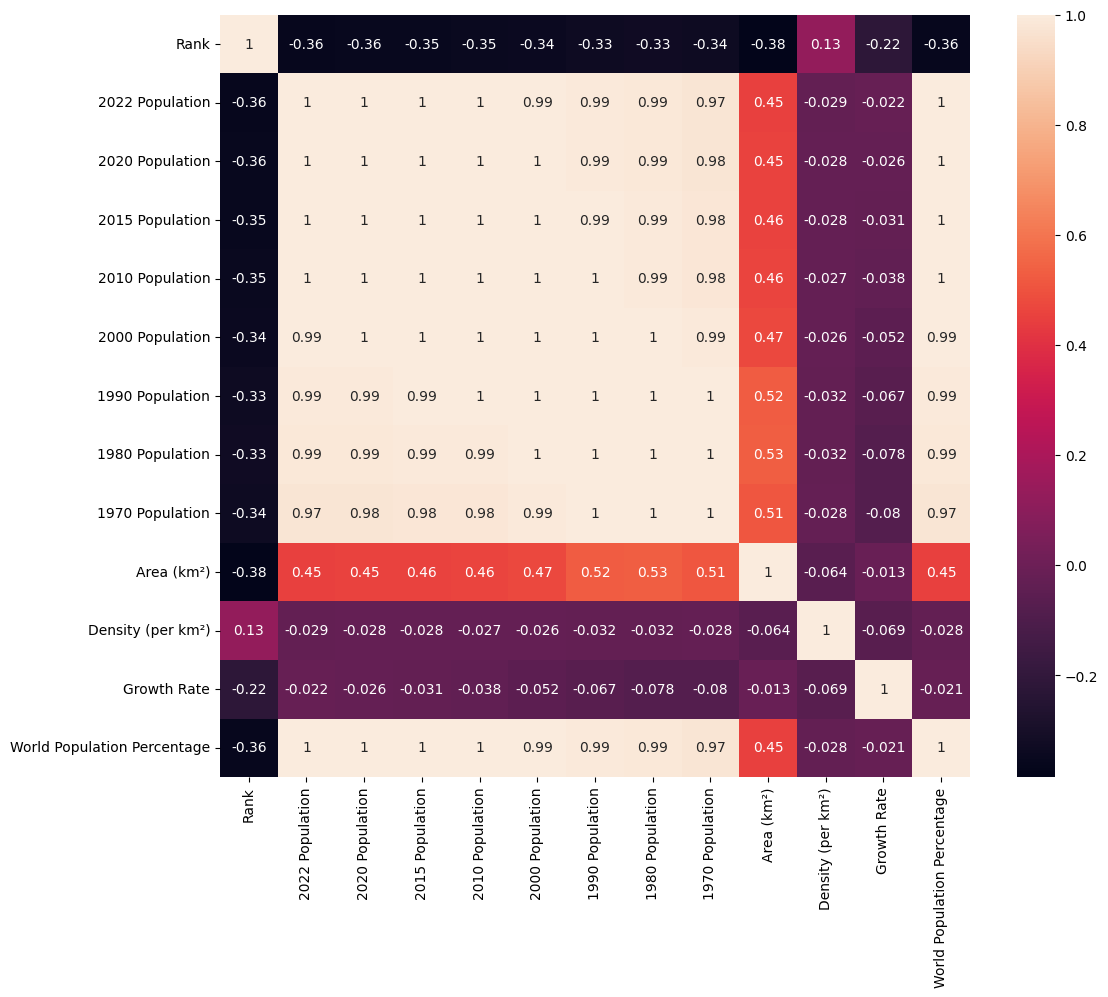

In [88]:
sns.heatmap(df.corr(numeric_only=True), annot = True)

r = 1.1
plt.rcParams['figure.figsize'] = (r*16,r*9)  # Ajuste de imagen, modifique respecto a su resolución.

plt.show()

El método groupby divide un DataFrame en grupos más pequeños, a la que puede aplicar funciones de agregación (sum, mean, count, max o min), transformación (normalizaciones o estandarizaciones) y filtrado (selección de grupos específicos).

En la celda de abajo se agrupa por continente y se aplica la función suma, es decir, se creará una celda por cada valor en "continente" (África, Asia, ...)
y los valores por columnas serán la suma de de quienes comparten continente.

In [96]:
df.groupby(by='Continent', dropna=True).sum()  # Esto es: "Agrupar por continente y sumar todos los valores"
                                               #  los strings serán concatenados y los valores numéricos serán sumados, un tipo de dato incompatible arrojará un error.


,Rank,CCA3,Country,Capital,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Continent,,,,,,,,,,,,,,,,
Africa,5253,DZAAGOBENBWABFABDICMRCPVCAFTCDCOMDJICODEGYGNQE...,AlgeriaAngolaBeninBotswanaBurkina FasoBurundiC...,AlgiersLuandaPorto-NovoGaboroneOuagadougouBuju...,1425529262.00,1360671810.00,1156663993.00,1020502655.00,817508493.00,637110013.00,480817791.00,361194640.00,30121241.00,6952.36,57.19,17.87
Asia,3878,AFGARMAZEBHRBGDBTNBRNKHMCHNGEOHKGINDIDNIRNIRQI...,AfghanistanArmeniaAzerbaijanBahrainBangladeshB...,KabulYerevanBakuManamaDhakaThimphuBandar Seri ...,4720041978.00,4652801584.00,4458250182.00,4187125190.00,3706718415.00,2334719776.00,1933360000.00,2104314136.00,32138141.00,51251.21,50.47,59.19
Europe,6225,ALBANDAUTBLRBELBIHBGRHRVCYPCZEDNKESTFROFINFRAD...,AlbaniaAndorraAustriaBelarusBelgiumBosnia and ...,TiranaAndorra la VellaViennaMinskBrusselsSaraj...,737713219.00,745792196.00,736345252.00,735613934.00,726066600.00,709689789.00,681600217.00,655923991.00,23010411.00,33166.24,50.11,9.33
North America,6437,AIAATGABWBHSBRBBLZBMUVGBCANCYMCRICUBCUWDMADOMS...,AnguillaAntigua and BarbudaArubaBahamasBarbado...,The ValleySaint John’sOranjestadNassauBridgeto...,600296136.00,594236593.00,570383850.00,542720651.00,486069584.00,421266425.00,368293361.00,315434606.00,24244178.00,10354.78,39.17,7.51
Oceania,4336,ASMAUSCOKFJIPYFGUMKIRMHLFSMNRUNCLNZLNIUNFKPLWP...,American SamoaAustraliaCook IslandsFijiFrench ...,Pago PagoCanberraAvaruaSuvaPapeeteHagåtñaTaraw...,45020499.00,43933426.00,40403283.00,37102764.00,31222778.00,26743822.00,22920240.00,19480270.00,8515081.00,3048.49,23.17,0.55
South America,1366,ARGBOLBRACHLCOLECUFLKGUFGUYPRYPERSURURYVEN,ArgentinaBoliviaBrazilChileColombiaEcuadorFalk...,Buenos AiresSucreBrasiliaSantiagoBogotaQuitoSt...,436816608.00,431530043.00,413134396.00,348262142.00,325206553.00,297146415.00,241789006.00,192947156.00,16916937.00,293.61,14.11,5.48


Para seleccionar solo las columnas numéricas podemos utilizar el método _get_numeric_data() que genera un DataFrame con las variables numéricas.
Luego puede seleccionar alguna variable categórica y concatenarla para realizar agrupaciones.

La función concat() es para concatenar varios DataFrame o Series, es necesario que sean de un tamaño compatible respecto a su eje. Los dos argumentos principales de concat() son: 
-   objs: una lista o tupla con las Series o DataFrame a concatenar
-   axis: "1" para concatenar columnas, "0" para concatenar filas.



In [97]:
df2 = pd.concat([df['Continent'],df._get_numeric_data()],axis=1)
df2.groupby('Continent').sum()  # Población total por continente.


,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Continent,,,,,,,,,,,,,
Africa,5253,1425529262.00,1360671810.00,1156663993.00,1020502655.00,817508493.00,637110013.00,480817791.00,361194640.00,30121241.00,6952.36,57.19,17.87
Asia,3878,4720041978.00,4652801584.00,4458250182.00,4187125190.00,3706718415.00,2334719776.00,1933360000.00,2104314136.00,32138141.00,51251.21,50.47,59.19
Europe,6225,737713219.00,745792196.00,736345252.00,735613934.00,726066600.00,709689789.00,681600217.00,655923991.00,23010411.00,33166.24,50.11,9.33
North America,6437,600296136.00,594236593.00,570383850.00,542720651.00,486069584.00,421266425.00,368293361.00,315434606.00,24244178.00,10354.78,39.17,7.51
Oceania,4336,45020499.00,43933426.00,40403283.00,37102764.00,31222778.00,26743822.00,22920240.00,19480270.00,8515081.00,3048.49,23.17,0.55
South America,1366,436816608.00,431530043.00,413134396.00,348262142.00,325206553.00,297146415.00,241789006.00,192947156.00,16916937.00,293.61,14.11,5.48


In [98]:
columnas_buscadas = ['1970 Population', '1980 Population', '1990 Population', '2000 Population',
       '2010 Population', '2015 Population', '2020 Population',
       '2022 Population'] # También es posible elegir manualmente las columnas llamandolas por su nombre en una lista.

df2 = df.groupby('Continent')[columnas_buscadas].mean().sort_values(by="2022 Population",ascending=False)  # Aplica el promedio y ordena.
df2  # Población promedio por continente en cada intervalo de tiempo.

,1970 Population,1980 Population,1990 Population,2000 Population,2010 Population,2015 Population,2020 Population,2022 Population
Continent,,,,,,,,
Asia,43839877.83,40278333.33,48639995.33,80580835.11,89087770.00,89165003.64,94955134.37,96327387.31
South America,13781939.71,17270643.29,21224743.93,25015888.69,26789395.54,29509599.71,30823574.50,31201186.29
Africa,6567175.27,8586031.98,11376964.52,14598365.95,18898197.31,21419703.57,23871435.26,25455879.68
Europe,13118479.82,14200004.52,14785203.94,14817685.71,14712278.68,15027454.12,14915843.92,15055371.82
North America,7885865.15,9207334.03,10531660.62,12151739.60,13568016.28,14259596.25,14855914.82,15007403.40
Oceania,846968.26,996532.17,1162774.87,1357512.09,1613163.65,1756664.48,1910148.96,2046386.32


In [99]:
df3 = df2.transpose()  # Puede transponer los datos para acomodarlos en una gráfica.
df3

Continent,Asia,South America,Africa,Europe,North America,Oceania
1970 Population,43839877.83,13781939.71,6567175.27,13118479.82,7885865.15,846968.26
1980 Population,40278333.33,17270643.29,8586031.98,14200004.52,9207334.03,996532.17
1990 Population,48639995.33,21224743.93,11376964.52,14785203.94,10531660.62,1162774.87
2000 Population,80580835.11,25015888.69,14598365.95,14817685.71,12151739.60,1357512.09
2010 Population,89087770.00,26789395.54,18898197.31,14712278.68,13568016.28,1613163.65
2015 Population,89165003.64,29509599.71,21419703.57,15027454.12,14259596.25,1756664.48
2020 Population,94955134.37,30823574.50,23871435.26,14915843.92,14855914.82,1910148.96
2022 Population,96327387.31,31201186.29,25455879.68,15055371.82,15007403.40,2046386.32


Pandas incluye un método para graficar datos este es .plot(), existen muchos argumentos para visualizar pero debe ver cuales le acomodan.

-   x: Etiqueta de una columna a utilizar como eje x
-   y: Etiqueta de una columna a utilizar como eje y
-   kind: Tipo de gráfica como 'line', 'bar', 'barh' (barra horizontal), 'hist' (histograma), 'box', 'scatter', 'pie'...
-   subplots: Creará subgráficos por columna.
-   title: título del gráfico
-   figsize: tupla con el tamaño del gráfico (ancho, alto)
-   style: Una lista de estilos de línea para cada columna (por ejemplo, ['-', '--', '-.'])
-   legend: Si es True, se mostrará una leyenda en el gráfico.
-   grid: Si es True, se mostrará una cuadrícula en el gráfico.
-   xlabel, ylabel: Etiquetas para los ejes x e y.

Más info en: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

<Axes: title={'center': 'Título gráfica'}, xlabel='Título eje x', ylabel='Título eje y'>

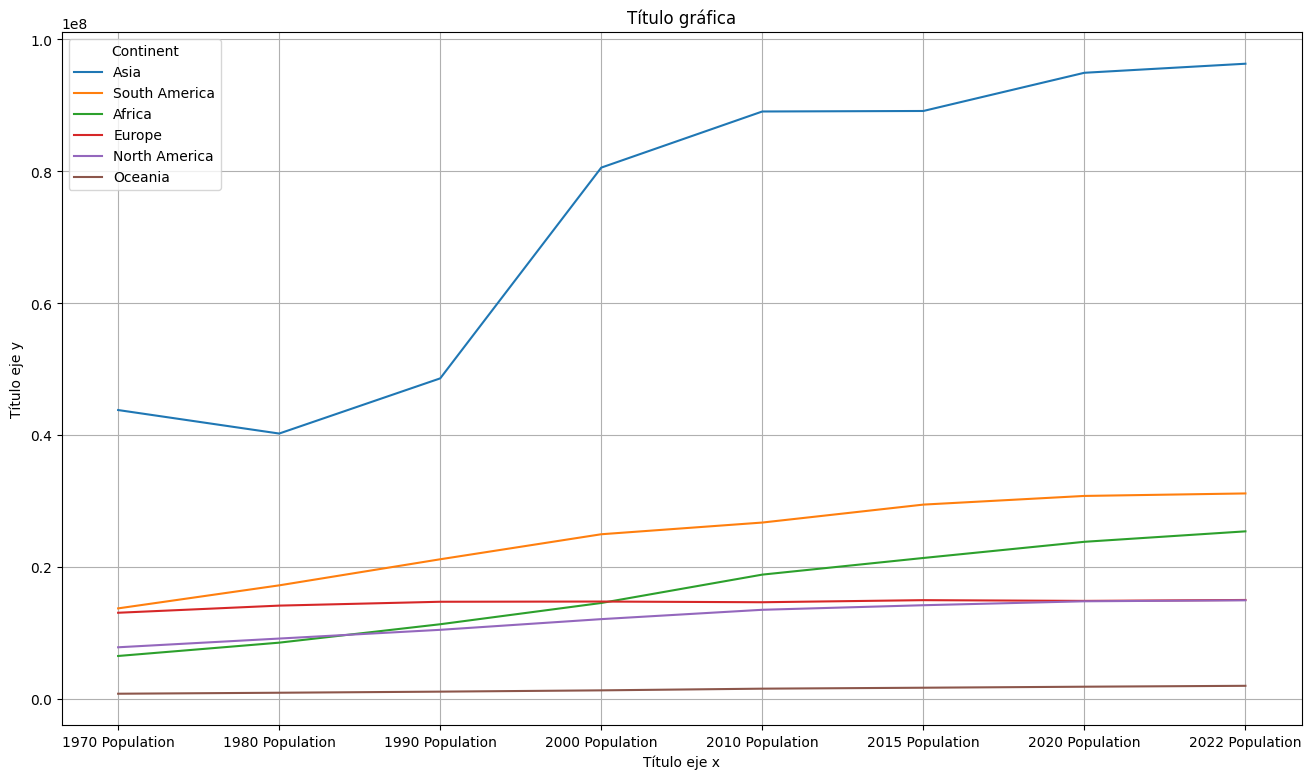

In [89]:
df3.plot(figsize=(16,9),kind='line', legend=True, grid=True, title='Título gráfica',ylabel='Título eje y', xlabel='Título eje x')  # método para graficar en pandas.

<Axes: >

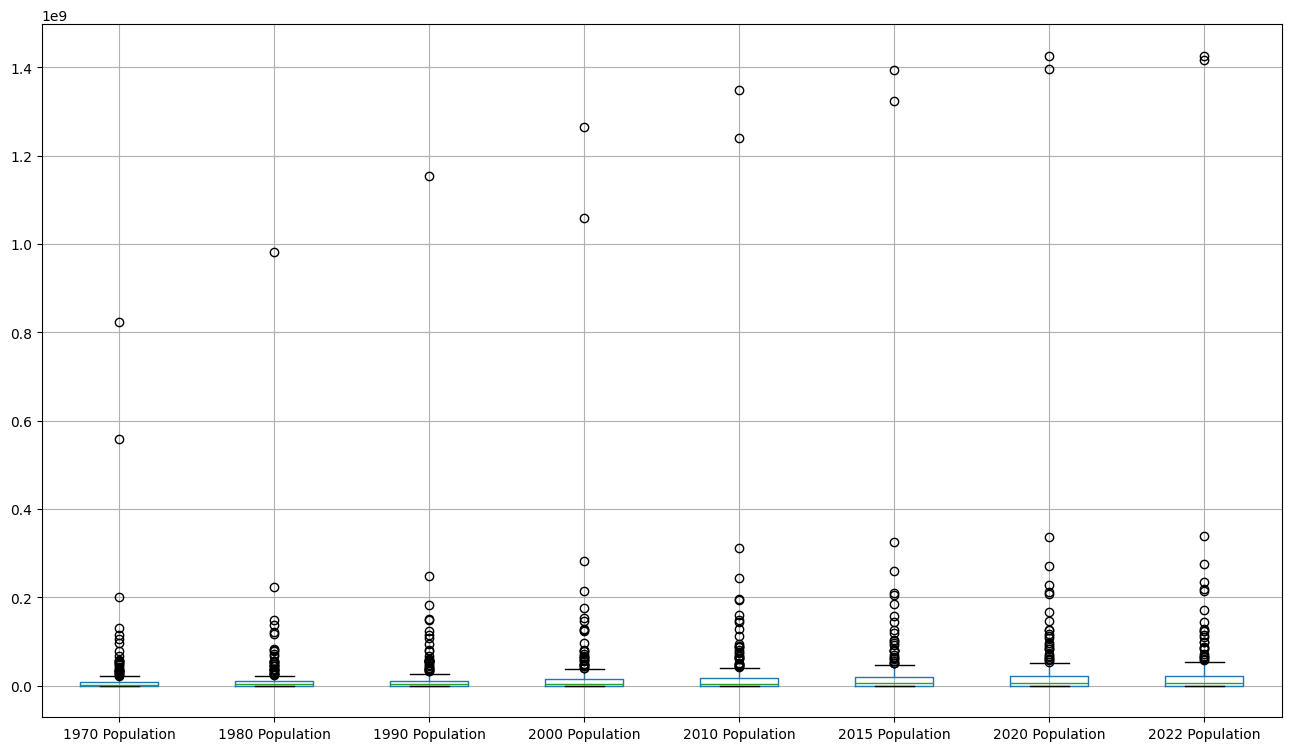

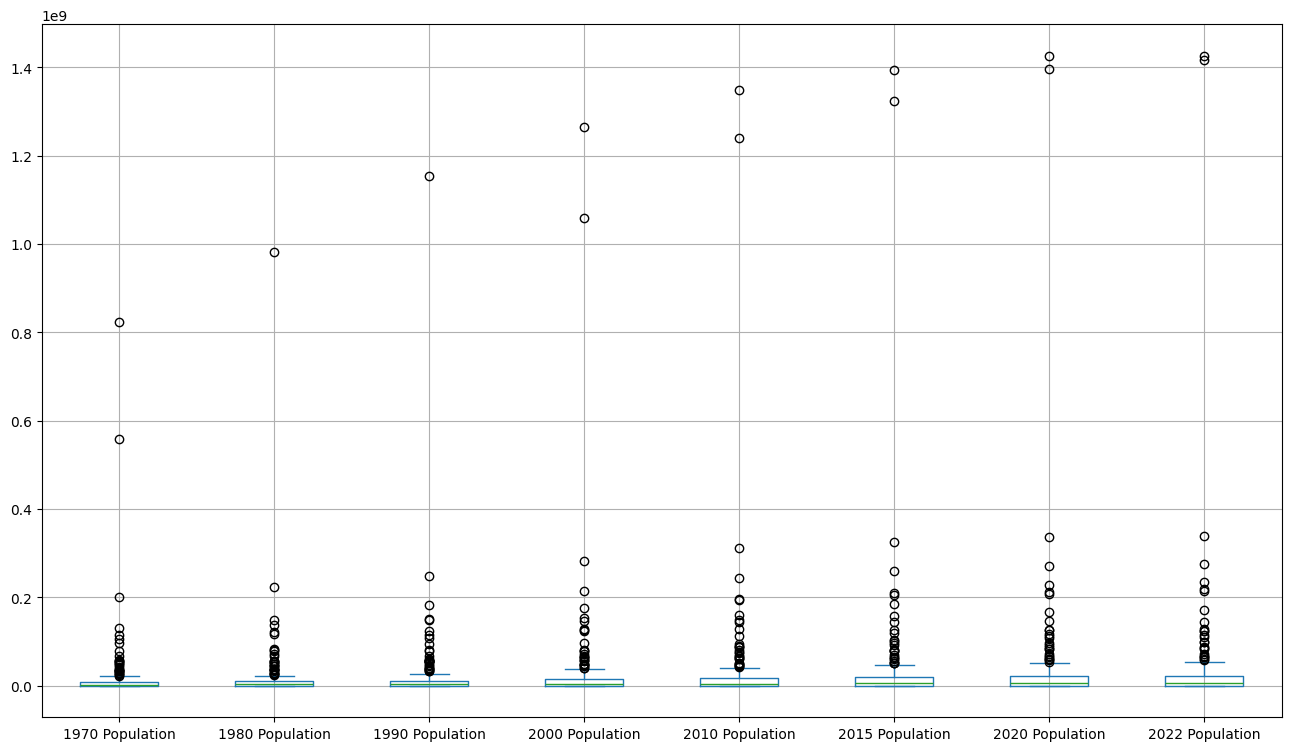

In [90]:
df4 = df[columnas_buscadas]  # Dataframe solo con las columnas de población

df4.boxplot(figsize=(16,9))    # Son equivalentes
df4.plot(kind='box',figsize=(16,9),grid=True)